In [1]:
import numpy as np
import matplotlib.pyplot as plt

(196608,)
3.0


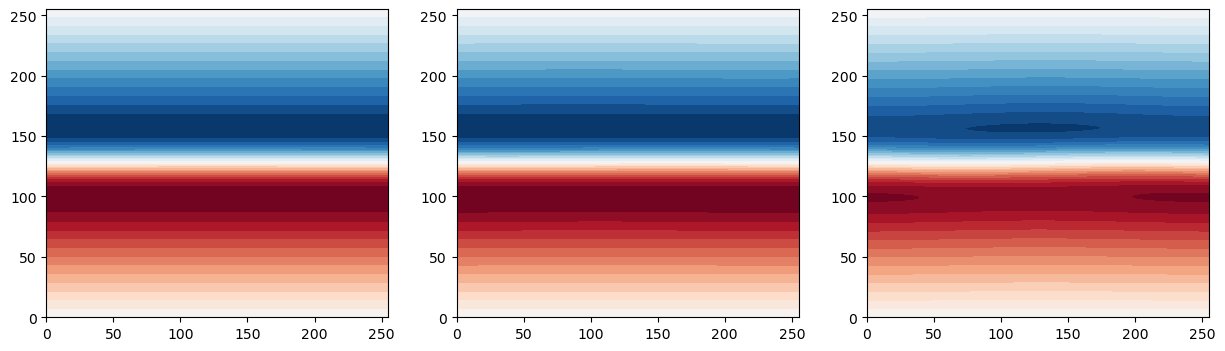

In [33]:
ds = np.loadtxt('conf_k1.txt')
print(ds.shape)
nb_frame = len(ds)/(256*256)
print(nb_frame)
nb_frame = int(nb_frame)

ds=ds.reshape([nb_frame,256,256])
ds.shape

psi = ds

fig, (ax) = plt.subplots(1,ds.shape[0],figsize=(15,4))

for i in range(ds.shape[0]):
    ax[i].contourf(psi[i,:,:],30,cmap='RdBu_r')


$$
\begin{aligned}
c_k(t,y) &= \sum_i \psi(t,x_i,y) . \mathbf{cos}(k.x_i)\\
s_k(t,y) &= \sum_i \psi(t,x_i,y) . \mathbf{sin}(k.x_i)
\end{aligned}
$$

and

$$
\begin{aligned}
A_k(t,y) &= \sqrt{c_k^2 + s_k^2}\\
\varphi_k(t,y) &= \mathbf{arctan}\left(\frac{s_k}{c_k}\right)
\end{aligned}
$$


and

$$
\begin{aligned}
\overline{A}_k(t) &= \int A_k(t,y).dy\\
\overline{\varphi}_k(t) &= \int \varphi_k(t,y).dy
\end{aligned}
$$

Text(0, 0.5, '$\\overline{\\varphi}_k$')

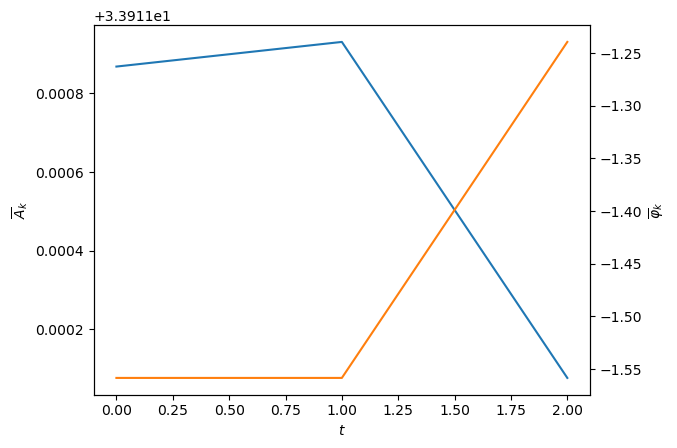

In [42]:
x, y = np.linspace(0,2*np.pi, 256), np.linspace(0,2*np.pi, 256)
k0, l0 = 1.0, 0.0

altern = 'y'

if altern == 'y':
    ck = np.sum(psi*np.cos(x*k0)[np.newaxis,:,np.newaxis],axis=1)
    sk = np.sum(psi*np.sin(x*k0)[np.newaxis,:,np.newaxis],axis=1)
elif altern == 'x':
    ck = np.sum(psi*np.cos(y*l0)[np.newaxis,np.newaxis,:],axis=2)
    sk = np.sum(psi*np.sin(y*l0)[np.newaxis,np.newaxis,:],axis=2)




Ak = np.sqrt(ck**2 + sk**2)
phik = np.atan(sk/ck)

Akbar = np.mean(Ak,axis=1)
phikbar = np.mean(phik,axis=1)


fig, (ax) = plt.subplots(1,1)

ax.plot(Akbar)
ax.set_ylabel(r'$\overline{A}_k$')
ax.set_xlabel(r'$t$')
ax1 = ax.twinx()
ax1.plot(phikbar,'C1')
ax1.set_ylabel(r'$\overline{\varphi}_k$')
